In [13]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


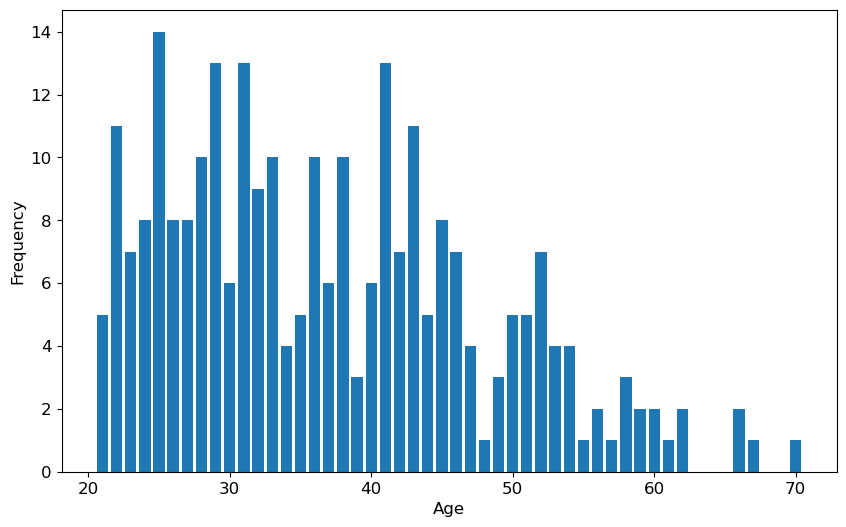

In [35]:
# Positive case distribution

x = df.loc[df['Outcome']==1]['Age'].value_counts().index
y = df.loc[df['Outcome']==1]['Age'].value_counts().values

plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [64]:
df_scaled = pd.read_csv('diabetes_scaled.txt', sep=' ', header=None).drop(columns=[9])
label = df_scaled.loc[:, 0].to_numpy()
fn_1 = lambda x: x.str[2:].astype('float32')
df_scaled = df_scaled.loc[:, 1:].apply(fn_1, axis=1)
X = df_scaled.to_numpy()
Y = label



from torch.utils.data import Dataset, DataLoader
class CustomDataset(Dataset):
    def __init__(self, data, targets):
        self.data = data
        self.targets = targets

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = {
            'data': self.data[idx],
            'target': self.targets[idx]
        }
        return sample



custom_dataset = CustomDataset(X, Y)
batch_size = 16
custom_dataloader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)


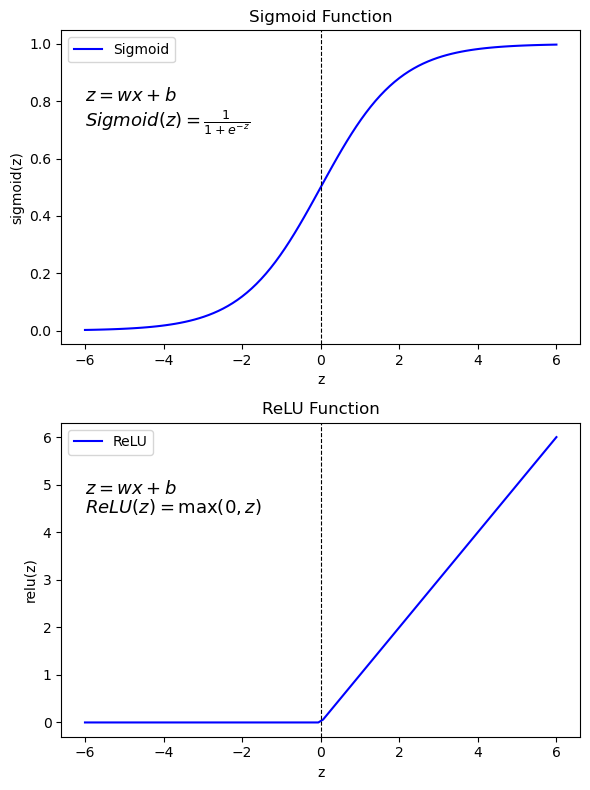

In [34]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-6, 6, 100)
sigmoid = 1 / (1 + np.exp(-x))
relu = np.maximum(0, x)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))



# Plot the sigmoid function
ax1.plot(x, sigmoid, label='Sigmoid', color='blue')
ax1.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax1.text(-6, 0.8, r'$z = wx + b$', fontsize=13, color='black') 
ax1.text(-6, 0.71, r'$Sigmoid(z) = \frac{1}{1 + e^{-z}}$', fontsize=13, color='black')
ax1.set_title('Sigmoid Function')
ax1.set_xlabel('z')
ax1.set_ylabel('sigmoid(z)')
ax1.legend()

# Plot the ReLU function
ax2.plot(x, relu, label='ReLU', color='blue')
ax2.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax2.text(-6, 4.8, r'$z = wx + b$', fontsize=13, color='black') 
ax2.text(-6, 4.4, r'$ReLU(z) = \max(0, z)$', fontsize=13, color='black')
ax2.set_title('ReLU Function')
ax2.set_xlabel('z')
ax2.set_ylabel('relu(z)')
ax2.legend()

plt.tight_layout()
plt.show()


In [69]:
for i in custom_dataloader:
    print(i['target'])
    break

tensor([ 1,  1,  1,  1,  1,  1,  1, -1, -1,  1, -1,  1,  1, -1,  1,  1])


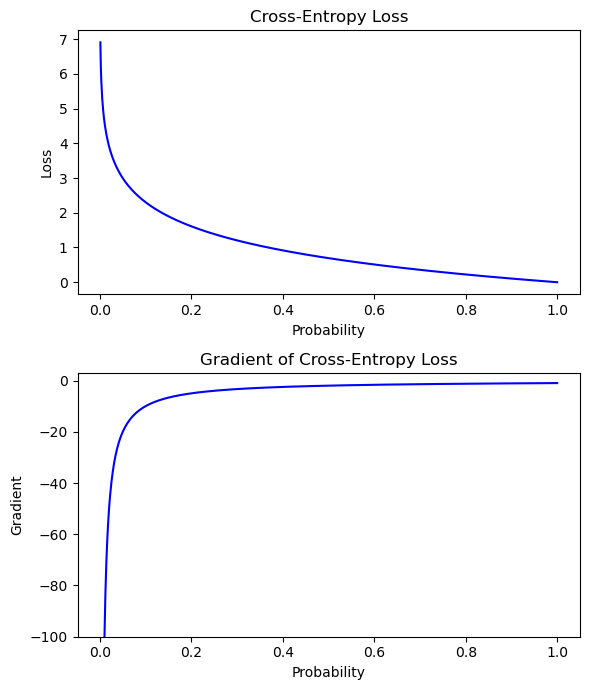

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cross-entropy loss function
def cross_entropy_loss(probs):
    return -np.log(probs)

# Define the gradient of the cross-entropy loss function
def gradient_cross_entropy_loss(probs):
    return -1/probs

pred_probs = np.arange(0.001, 1.001, 0.001)
loss_values = cross_entropy_loss(pred_probs)
gradient_values = gradient_cross_entropy_loss(pred_probs)

# Create a figure with two vertically stacked subplots
plt.figure(figsize=(6, 7))

# Create the plot for the loss
plt.subplot(211)
plt.plot(pred_probs, loss_values, label='Cross-Entropy Loss', color='blue')
plt.xlabel('Probability')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')


# Create the plot for the gradient
plt.subplot(212)
plt.plot(pred_probs, gradient_values, label='Gradient', color='blue')
plt.xlabel('Probability')
plt.ylabel('Gradient')
plt.ylim(-100, 3)
plt.title('Gradient of Cross-Entropy Loss')


plt.tight_layout()
plt.show()

